In [42]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
import pickle

Data Analysis and Preprocessing

In [44]:
df = pd.read_csv('D:/Bsc IT/3 year 2 sem/Inteligent System/Machine_Learning_Model_Deployment_with_Streamlit_Titanic_Dataset/data/titanic.csv') 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df.shape

(891, 12)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Exploratory Data Analysis(EDA)

In [48]:
print("\nMissing values per column:")
print(df.isnull().sum())

missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nMissing values percentage:")
print(missing_percent)


Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values percentage:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [49]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Meaningful visualisations

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30992\3522794643.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette='pastel')


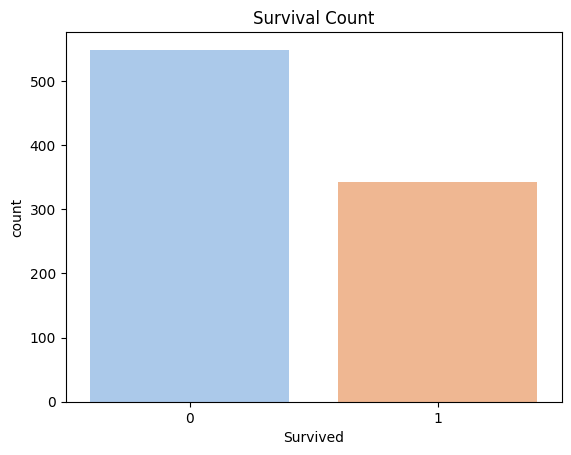

In [50]:
sns.countplot(data=df, x='Survived', palette='pastel')
plt.title("Survival Count")
plt.show()

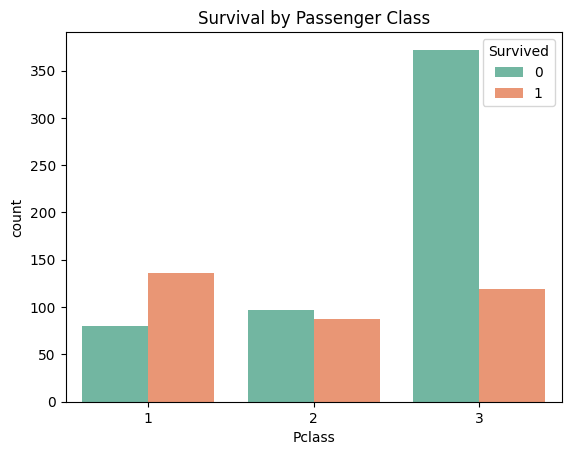

In [51]:
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set2')
plt.title("Survival by Passenger Class")
plt.show()

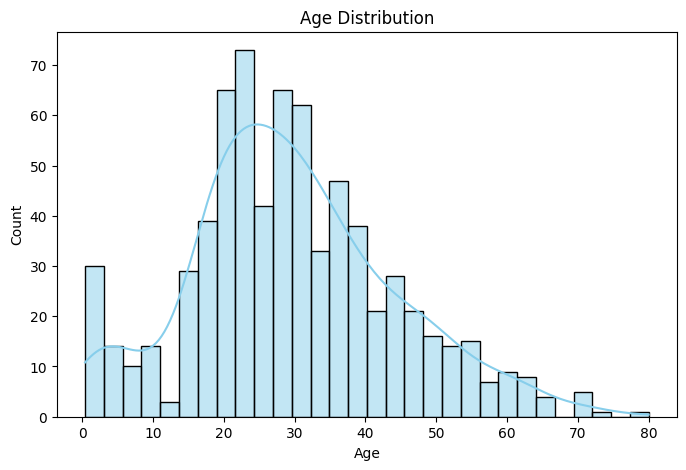

In [52]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

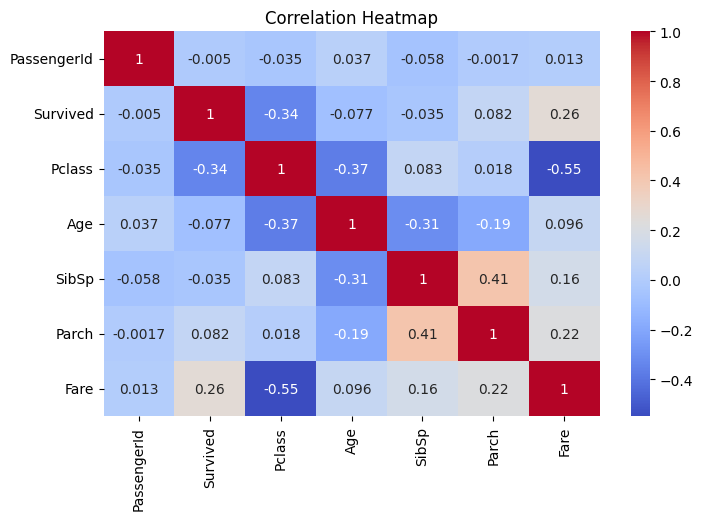

In [53]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Handle missing values

In [54]:
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_30992\4039603533.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_30992\4039603533.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Feature engineering

In [55]:
# New feature: family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Encode 'Sex' (male=0, female=1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,Embarked_Q,Embarked_S
0,1,0,3,Braund Mr. Owen Harris,0,22.0,1,0,A/5 21171,7.2500,2,False,True
1,2,1,1,Cumings Mrs. John Bradley (Florence Briggs Th...,1,38.0,1,0,PC 17599,71.2833,2,False,False
2,3,1,3,Heikkinen Miss. Laina,1,26.0,0,0,STON/O2. 3101282,7.9250,1,False,True
3,4,1,1,Futrelle Mrs. Jacques Heath (Lily May Peel),1,35.0,1,0,113803,53.1000,2,False,True
4,5,0,3,Allen Mr. William Henry,0,35.0,0,0,373450,8.0500,1,False,True


Train/Test split

In [56]:
from sklearn.model_selection import train_test_split

# Define features (exclude target 'Survived' and PassengerId, Name, Ticket)
X = df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])
y = df['Survived']

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (712, 9)
Test set shape: (179, 9)


Train Logistic Regression

In [57]:
# Create model
log_reg = LogisticRegression(max_iter=1000)

# Cross-validation (5 folds)
log_reg_cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic Regression CV Accuracy: {:.2f} ± {:.2f}".format(
    log_reg_cv_scores.mean(), log_reg_cv_scores.std()
))

# Fit on full training data
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred_lr = log_reg.predict(X_test)

# Evaluate
print("\nLogistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression CV Accuracy: 0.79 ± 0.02

Logistic Regression Test Accuracy: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
 [[98 12]
 [23 46]]


Train Random Forest

In [58]:
# Create model
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)

# Cross-validation (5 folds)
rf_cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest CV Accuracy: {:.2f} ± {:.2f}".format(
    rf_cv_scores.mean(), rf_cv_scores.std()
))

# Fit on full training data
rf_clf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_clf.predict(X_test)

# Evaluate
print("\nRandom Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest CV Accuracy: 0.80 ± 0.05

Random Forest Test Accuracy: 0.8156424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

Confusion Matrix:
 [[96 14]
 [19 50]]


Compare and choose best model

In [59]:
if rf_cv_scores.mean() > log_reg_cv_scores.mean():
    best_model = rf_clf
    best_model_name = "Random Forest"
else:
    best_model = log_reg
    best_model_name = "Logistic Regression"

print("\nBest Model Selected:", best_model_name)


Best Model Selected: Random Forest


Save the trained model

In [60]:
# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Also save feature names for reference
with open("feature_names.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

print("Model and feature names saved successfully using pickle.")

Model and feature names saved successfully using pickle.


Load model

In [61]:
# Example: loading back the saved model
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

with open("feature_names.pkl", "rb") as f:
    feature_names = pickle.load(f)